In [1]:
import sys
import os
import gpxpy

sys.path.append('app/trailsapp')

import importlib
import analyze
import fit2gpx

import glob

In [39]:
import json
summarizedActivities = json.load(open("garmin-export/DI_CONNECT/DI-Connect-Fitness/volodymyr.s.savchenko@gmail.com_0_summarizedActivities.json"))[0]['summarizedActivitiesExport']
summarizedActivities += json.load(open("garmin-export/DI_CONNECT/DI-Connect-Fitness/volodymyr.s.savchenko@gmail.com_1001_summarizedActivities.json"))[0]['summarizedActivitiesExport']
summarizedActivities[0]

{'activityId': 14612787273,
 'uuidMsb': 8476673221944361562,
 'uuidLsb': -4951274234236500891,
 'name': 'Lausanne Running',
 'activityType': 'running',
 'userProfileId': 63564223,
 'timeZoneId': 124,
 'beginTimestamp': 1711576654000,
 'eventTypeId': 9,
 'rule': 'subscribers',
 'sportType': 'RUNNING',
 'startTimeGmt': 1711576654000.0,
 'startTimeLocal': 1711580254000.0,
 'duration': 2317316.89453125,
 'distance': 606574.0234375,
 'elevationGain': 4100.0,
 'elevationLoss': 4200.0,
 'avgSpeed': 0.2618000030517578,
 'maxSpeed': 0.3144000053405762,
 'avgRunCadence': 80.0,
 'maxRunCadence': 87.0,
 'steps': 6226.0,
 'calories': 2044.7297599999997,
 'startLongitude': 6.620622240006924,
 'startLatitude': 46.525127263739705,
 'avgStrideLength': 97.32872791999941,
 'avgFractionalCadence': 0.6875,
 'maxFractionalCadence': 0.5,
 'elapsedDuration': 2317316.89453125,
 'movingDuration': 2293634.002685547,
 'deviceId': 3961823680,
 'minTemperature': 16.0,
 'maxTemperature': 27.0,
 'minElevation': 49600

In [52]:

for fitfn in glob.glob("./garmin-export/DI_CONNECT/DI-Connect-Uploaded-Files/*.fit"):
    file_size = os.path.getsize(fitfn)
    if file_size < 1024*1024*0.5:
        # print(f"Skipping {fitfn} due to small size", file_size)
        continue
    print(f"Processing {fitfn} size {file_size}")
    gpxfn = os.path.join("garmin-data", os.path.basename(fitfn).replace('.fit', '.gpx'))
    # if os.path.exists(gpxfn):
    #     print(f"Skipping {fitfn} as {gpxfn} already exists")
    #     continue

    gpx = fit2gpx.Converter().fit_to_gpx(f_in=fitfn, f_out=gpxfn)
    print(gpx.get_time_bounds())
    
    t1, t2 = gpx.get_time_bounds()

    matched_activity = min(summarizedActivities, key=lambda x: abs(x['startTimeGmt']/1000 - t1.timestamp()))
    dt = t1.timestamp() - matched_activity['startTimeGmt']/1000
    print(f"Matched activity {matched_activity['activityType']} {dt} seconds off")
    if abs(dt) > 60*10:
        print("Activity is more than an 10 minutes off")
        matched_activity = None

    
    if matched_activity is not None:
        gpx.name = matched_activity['name']
        gpx.tracks[0].type = matched_activity['activityType']        

    print(gpx.length_3d(), gpx.get_duration()/60/60, t1, t2, )
    
    with open(gpxfn, "w") as f:
        f.write(gpx.to_xml())

    # break

Processing ./garmin-export/DI_CONNECT/DI-Connect-Uploaded-Files/volodymyr.s.savchenko@gmail.com_89216089669.fit size 647283
TimeBounds(start_time=Timestamp('2021-04-18 09:01:10+0000', tz='UTC'), end_time=Timestamp('2021-04-18 14:11:30+0000', tz='UTC'))
Matched activity trail_running 0.0 seconds off
30415.51650449934 5.172222222222222 2021-04-18 09:01:10+00:00 2021-04-18 14:11:30+00:00
Processing ./garmin-export/DI_CONNECT/DI-Connect-Uploaded-Files/volodymyr.s.savchenko@gmail.com_180141320340.fit size 1395707
TimeBounds(start_time=Timestamp('2023-03-18 17:54:27+0000', tz='UTC'), end_time=Timestamp('2023-03-19 13:02:12+0000', tz='UTC'))
Matched activity cycling 6.0 seconds off
9369.286708438272 19.129166666666666 2023-03-18 17:54:27+00:00 2023-03-19 13:02:12+00:00
Processing ./garmin-export/DI_CONNECT/DI-Connect-Uploaded-Files/volodymyr.s.savchenko@gmail.com_143577858797.fit size 845796
TimeBounds(start_time=Timestamp('2022-07-03 08:47:10+0000', tz='UTC'), end_time=Timestamp('2022-07-03 

In [38]:
import gpxpy

for gpxfn in glob.glob("garmin-data/*.gpx"):
    print(f"Analyzing {gpxfn}")
    gpx = gpxpy.parse(open(gpxfn).read())
    
    # break
    

Analyzing garmin-data/volodymyr.s.savchenko@gmail.com_42154510746.gpx
Matched activity hiking 0.0 seconds off
23740.556711067493 2019-10-13 07:45:40+00:00 2019-10-13 15:26:28+00:00
Analyzing garmin-data/volodymyr.s.savchenko@gmail.com_86936202116.gpx
Matched activity trail_running 0.0 seconds off
31429.804413343256 2021-03-28 08:46:45+00:00 2021-03-28 16:05:44+00:00
Analyzing garmin-data/volodymyr.s.savchenko@gmail.com_143577858797.gpx
Matched activity trail_running 0.0 seconds off
35142.82977992788 2022-07-03 08:47:10+00:00 2022-07-03 15:33:56+00:00
Analyzing garmin-data/volodymyr.s.savchenko@gmail.com_121657790887.gpx
Matched activity cycling 11.0 seconds off
14318.605804978206 2022-01-21 17:19:57+00:00 2022-01-21 18:46:23+00:00
Analyzing garmin-data/volodymyr.s.savchenko@gmail.com_140652212505.gpx
Matched activity trail_running 0.0 seconds off
39904.37394542662 2022-06-11 06:00:13+00:00 2022-06-11 14:04:12+00:00
Analyzing garmin-data/volodymyr.s.savchenko@gmail.com_102548986136.gpx


KeyboardInterrupt: 

In [35]:
gpx = gpxpy.parse(open("/home/savchenk/activity_14612787273.gpx").read())
gpx.length_3d()

6253.696631182635

/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:498: RuntimeWarning: invalid value encountered in divide
  speed_kph = d_d3/d_time *3600./1000.
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:499: RuntimeWarning: invalid value encountered in divide
  vam = d_altitude/d_time
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:500: RuntimeWarning: invalid value encountered in divide
  grade = d_altitude/d_d3*100.
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:512: RuntimeWarning: invalid value encountered in divide
  speed_kph = d_d3/d_time *3600./1000.
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:513: RuntimeWarning: divide by zero encountered in divide
  vam = d_altitude/d_time*1000
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:514: RuntimeWarning: divide by zero encountered in divide
  grade = d_altitude/d_d3*100.


found step 0.2
found step 2.05837
total time 7.68 hr


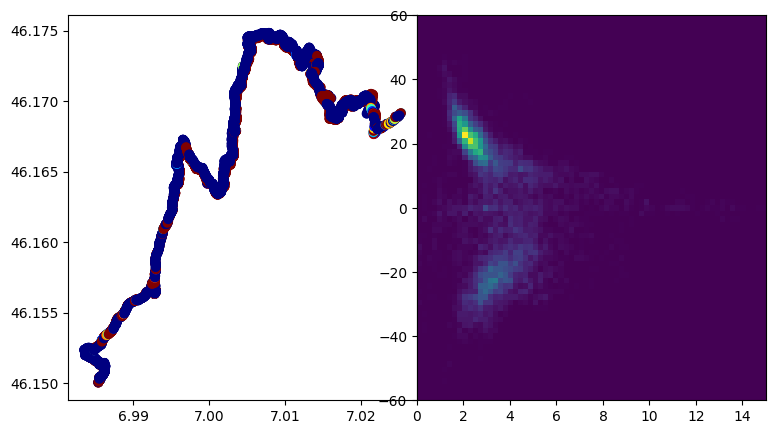

In [70]:
importlib.reload(analyze)
# analyze.produce_lut(gpx)
lut = analyze.produce_merged_lut([gpx])

/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:143: RuntimeWarning: invalid value encountered in divide
  route_grade = d_(route_altitude)/d_(route_d3, 10)*100.
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:63: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(lut_speed_grade[1][:-1]*dp)/np.sum(dp)
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:462: RuntimeWarning: divide by zero encountered in scalar divide
  d_time_estim = d_d/(speed_estim_for_grade(grade, lut)/3600.*1000)/(d_N-1)


None run trail
plotting
total distance 23.74 km
cumulative elevation gain 11.60 m
total elevation gain 1945.40 m
total time 5.60
run flat    28.7% time 1.61 hr 10.17 km -606.60 
walk up     42.3% time 2.37 hr 8.64 km 1588.30 
steep up     5.6% time 0.31 hr 0.54 km 179.70 
down steep  23.4% time 1.31 hr 4.07 km -1151.10 
all        100.0% time 5.60 hr 23.42 km 10.30 


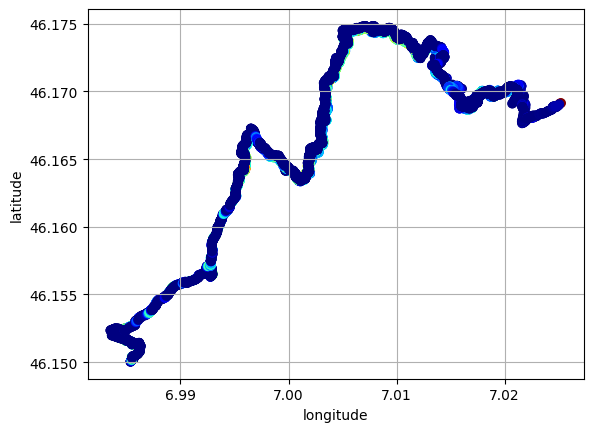

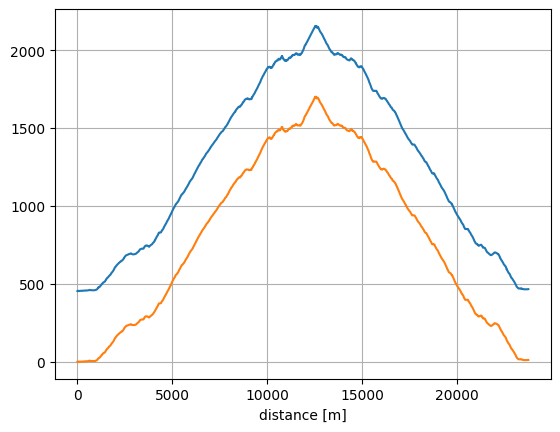

In [71]:
importlib.reload(analyze)

_ = analyze.analyze_route(dict(
    route_points=gpx.tracks[0].segments[0].points,
    route_gpx=gpx,
    type='run',
    sub_type='trail',
),
    plot=True,
    # lut_merged=lut,
)

7.94196181167817
4.262058423913043


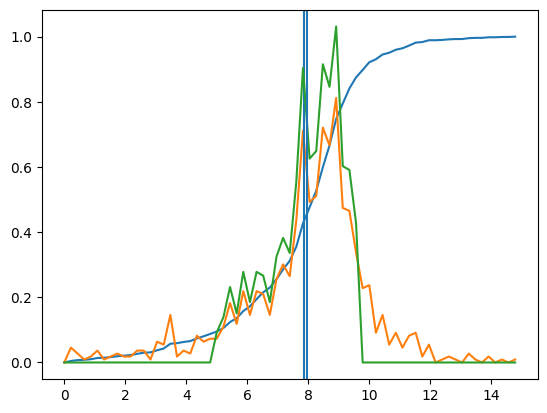

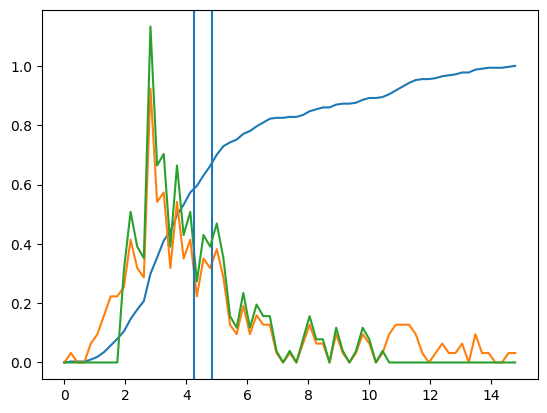

In [73]:
import numpy as np

merged_lut = np.load(open("lut_merged_prod.npy", "rb"), allow_pickle=True)

print(analyze.speed_estim_for_grade(0, merged_lut, plot=True))
print(analyze.speed_estim_for_grade(0, lut, plot=True))

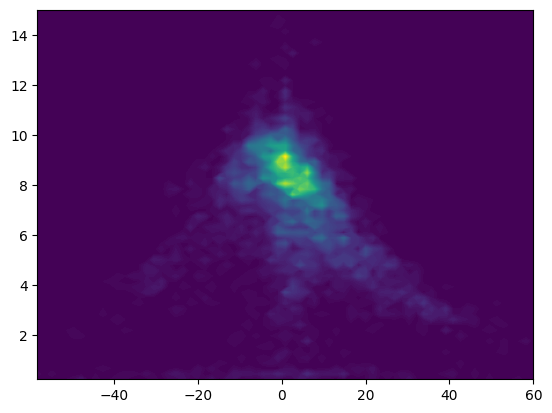

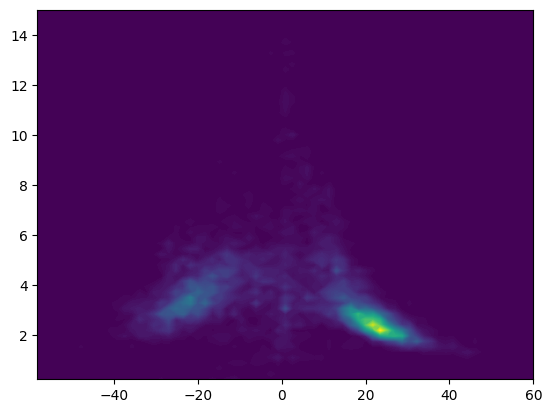

In [75]:
import matplotlib.pyplot as plt

plt.contourf(merged_lut[2][1:], merged_lut[1][1:], merged_lut[0], levels=100)
plt.figure()
plt.contourf(lut[2][1:], lut[1][1:], lut[0], levels=100)